In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualization style and enable inline plotting
sns.set_style("whitegrid")
%matplotlib inline

# --- Load Data ---
# ⚠️ Make sure to use the exact file name you uploaded to Colab
file_path = 'credit_card_transactions.csv'
df = pd.read_csv(file_path)

print("--- Data Head (First 5 Rows) ---")
print(df.head())

print("\n--- Data Info (Data Types and Non-Null Counts) ---")
df.info()

print("\n--- Shape (Rows and Columns) ---")
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")

--- Data Head (First 5 Rows) ---
   Unnamed: 0 trans_date_trans_time Transaction_Date  Transaction_Time  \
0      787549       12/1/19 4:19 PM         12/1/2019          4:19 PM   
1      793677       12/2/19 3:53 PM         12/2/2019          3:53 PM   
2      606211      9/14/19 10:19 PM         9/14/2019         10:19 PM   
3      352894       6/14/19 8:15 PM         6/14/2019          8:15 PM   
4      187885        4/7/19 3:32 PM          4/7/2019          3:32 PM   

         cc_num                          merchant category          amt  \
0  4.979420e+15            fraud_Satterfield-Lowe   travel  $28,948.90    
1  6.759100e+11  fraud_Monahan, Hermann and Johns   travel  $27,390.12    
2  3.040830e+13                 fraud_Boyer-Haley   travel  $26,544.12    
3  5.540640e+15               fraud_Hackett Group   travel  $25,086.94    
4  6.538440e+15                 fraud_Tillman LLC   travel  $17,897.24    

         first       last  ... city_pop                             job

In [3]:
# A. Drop Unnecessary Columns
# Drop columns that are unique identifiers or not useful for initial EDA (like 'Unnamed: 0', 'cc_num', 'first', 'last')
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'trans_num']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [4]:
# B. Handle Missing Values
print("\n--- Missing Values Count Before Cleaning ---")
print(df.isnull().sum())


--- Missing Values Count Before Cleaning ---
trans_date_trans_time    0
Transaction_Date         0
Transaction_Time         0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
unix_time                1
merch_lat                0
merch_long               0
is_fraud                 1
merch_zipcode            0
Age                      1
dtype: int64


In [5]:
# Impute (fill) missing values in crucial numeric columns using the Median
# Assuming 'merch_lat', 'merch_long' are the location columns with NaNs
for col in ['merch_lat', 'merch_long', 'merch_zipcode']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median() if df[col].dtype in ['float64', 'int64'] else df[col].mode()[0], inplace=True)

In [6]:
print(df.columns.tolist())

['trans_date_trans_time', 'Transaction_Date ', 'Transaction_Time', 'merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'Age']


In [7]:
# C. Data Type Conversion (Date and Time)
# 1. Use the combined column (which was already correct)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

# 2. Use the correct column name for the date, INCLUDING THE SPACE
df['Transaction_Date '] = pd.to_datetime(df['Transaction_Date '], errors='coerce')

/tmp/ipython-input-3929491084.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')


In [10]:
# 1. Fill NaN values with 0
df['is_fraud'] = df['is_fraud'].fillna(0)

# 2. Now convert to integer (this will succeed)
df['is_fraud'] = df['is_fraud'].astype('int')

# Or combine steps:
# df['is_fraud'] = df['is_fraud'].fillna(0).astype('int')

In [11]:
print("\n--- 1. Summary Statistics for Numeric Variables ---")
print(df.describe())
# Observation 1: Check for extreme values (Outliers) in 'amt'.

print("\n--- 2. 'is_fraud' Value Counts (Target Variable Analysis) ---")
fraud_counts = df['is_fraud'].value_counts()
print(fraud_counts)

# Observation 2: Check for Imbalanced Data (Fraud count is typically much lower than Non-Fraud).

print("\n--- 3. Top 10 'category' Counts ---")
print(df['category'].value_counts().head(10))
# Observation 3: Identify the most frequent transaction categories.


--- 1. Summary Statistics for Numeric Variables ---
               trans_date_trans_time              Transaction_Date   \
count                           3544                           3544   
mean   2019-08-13 09:40:19.672686336  2019-08-12 17:30:20.316027136   
min              2019-01-01 02:54:00            2019-01-01 00:00:00   
25%              2019-05-05 17:26:00            2019-05-05 00:00:00   
50%              2019-08-17 22:58:30            2019-08-17 00:00:00   
75%              2019-12-02 19:33:00            2019-12-02 00:00:00   
max              2020-03-10 13:37:00            2020-03-10 00:00:00   
std                              NaN                            NaN   

                zip          lat         long      city_pop     unix_time  \
count   3543.000000  3543.000000  3543.000000  3.543000e+03  3.543000e+03   
mean   48414.403613    38.230561   -90.004914  1.090972e+05  1.344840e+09   
min     1257.000000    20.027100  -165.672300  2.300000e+01  1.325386e+09   

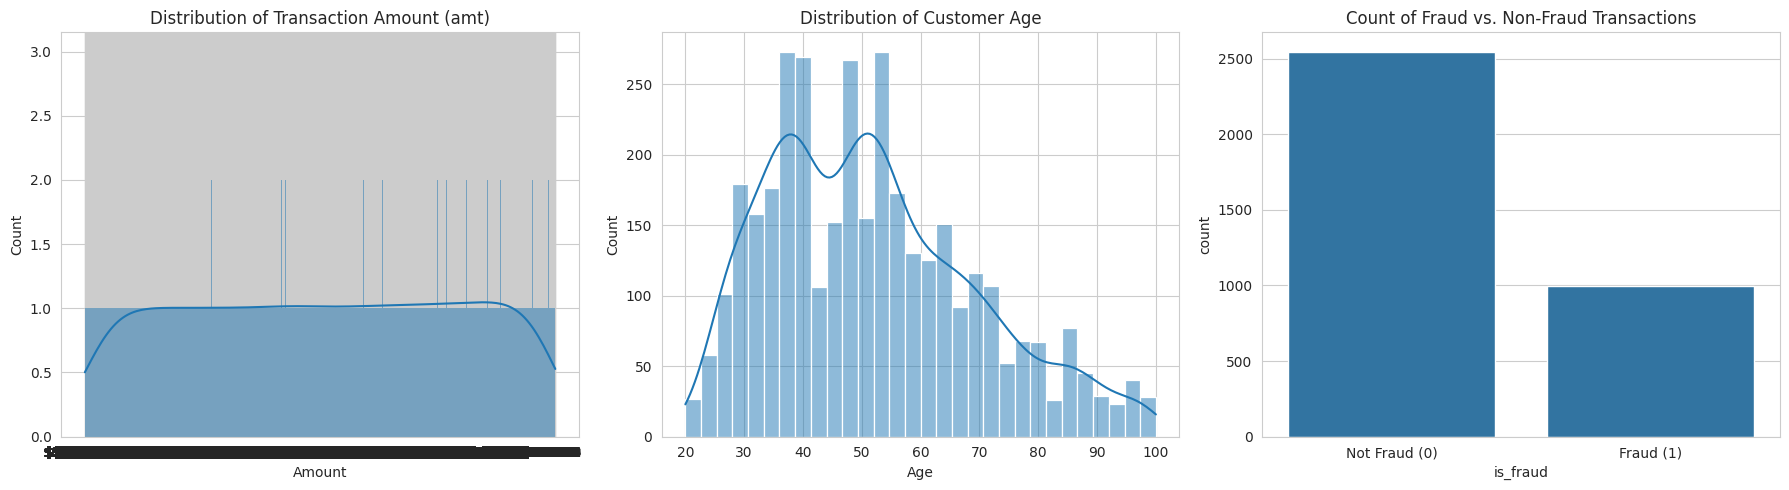

In [12]:
plt.figure(figsize=(18, 5))

# 1. Distribution of Transaction Amount ('amt')
plt.subplot(1, 3, 1)
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Amount')

# 2. Distribution of Customer Age ('Age')
plt.subplot(1, 3, 2)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')

# 3. Target Variable Count
plt.subplot(1, 3, 3)
sns.countplot(x='is_fraud', data=df)
plt.title('Count of Fraud vs. Non-Fraud Transactions')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('is_fraud')

plt.tight_layout()
plt.show()

# Write Observations for each plot here.

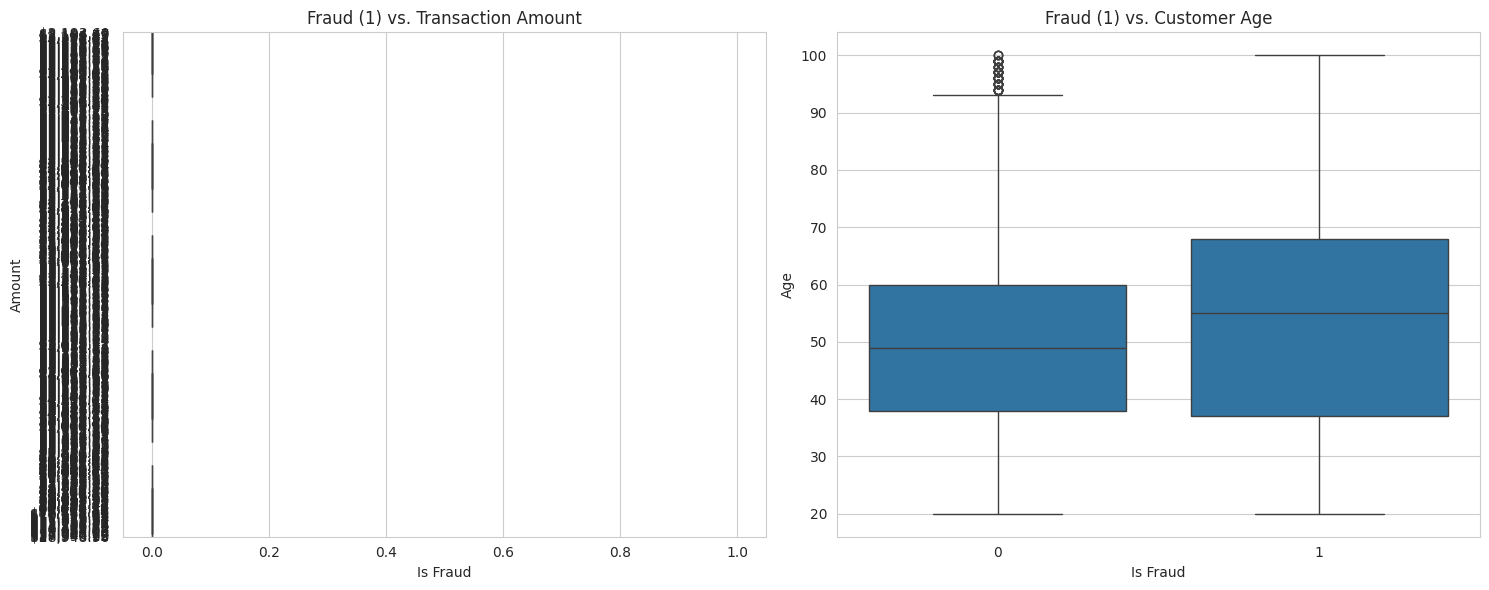

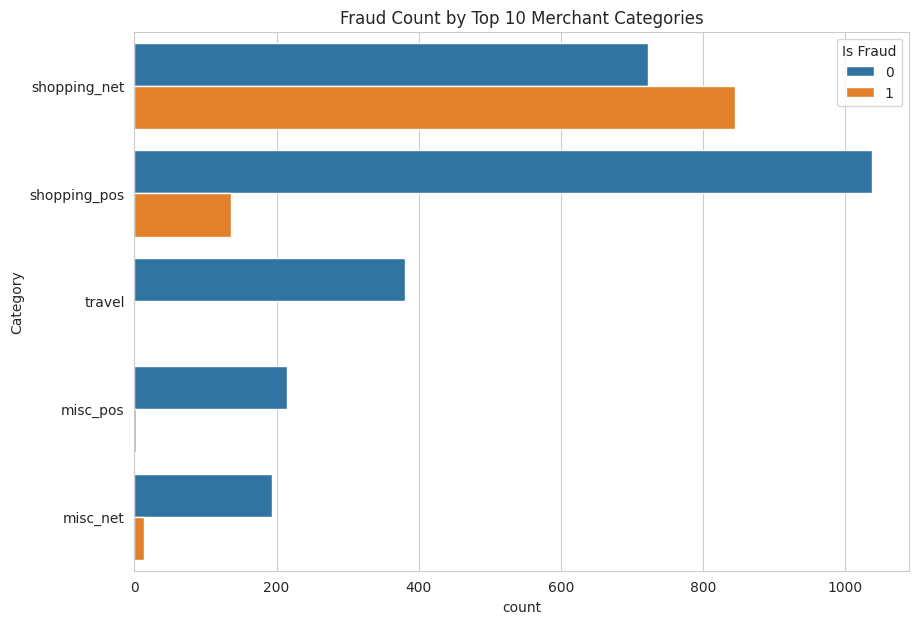

In [13]:
plt.figure(figsize=(15, 6))

# 1. Fraud vs. Transaction Amount (Boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Fraud (1) vs. Transaction Amount')
plt.ylim(0, 500) # Limit Y-axis to focus on the majority of data, excluding extreme outliers
plt.xlabel('Is Fraud')
plt.ylabel('Amount')

# 2. Fraud vs. Age (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='Age', data=df)
plt.title('Fraud (1) vs. Customer Age')
plt.xlabel('Is Fraud')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Write Observations: Compare the median and spread of 'amt' and 'Age' between the two groups.

# 3. Fraud Count by Category
plt.figure(figsize=(10, 7))
# Plot the top 10 categories to keep the visualization clear
top_10_categories = df['category'].value_counts().index[:10]
sns.countplot(y='category', hue='is_fraud', data=df[df['category'].isin(top_10_categories)],
              order=top_10_categories)
plt.title('Fraud Count by Top 10 Merchant Categories')
plt.ylabel('Category')
plt.legend(title='Is Fraud')
plt.show()

# Write Observations: Which categories have the highest absolute count of fraud transactions?

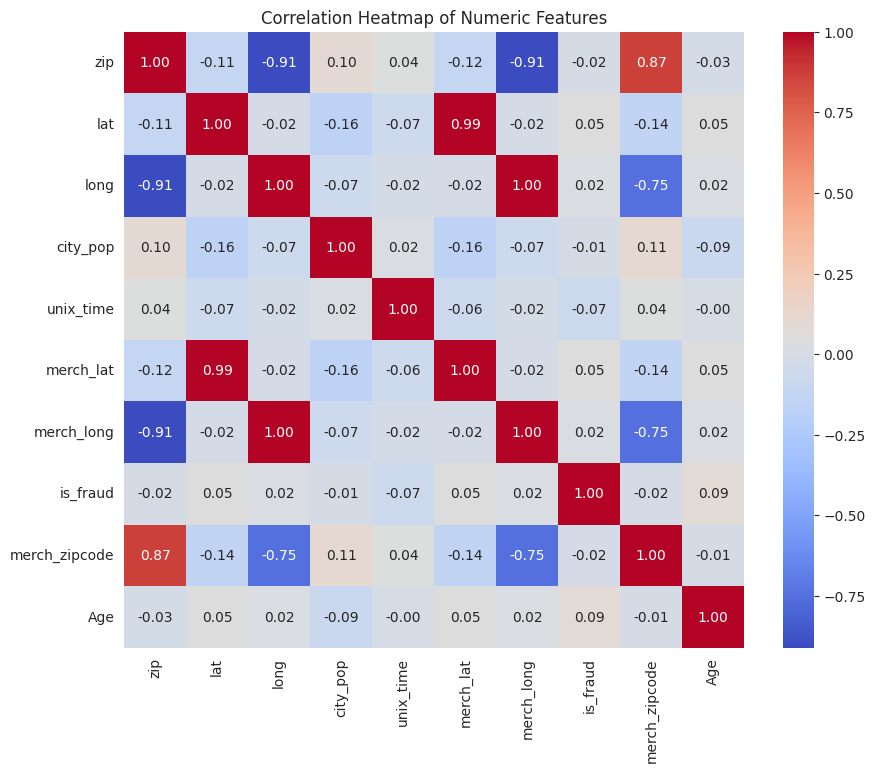

In [14]:
# Select only numeric data for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
# Annot=True shows the correlation values on the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Write Observations: Look for strong correlations (close to 1 or -1) between any two variables.

In [15]:
print("--- Summary of Key EDA Findings ---")

# 1. Data Quality and Preparation:
print(f"* Missing Data: All missing values in key columns ('merch_lat', 'merch_long', etc.) were successfully imputed/filled.")

# 2. Target Variable (is_fraud):
print(f"* Imbalance Issue: The data is highly imbalanced, with only {fraud_counts[1]} fraud transactions compared to {fraud_counts[0]} non-fraud transactions. This will require special handling during modeling.")

# 3. Key Trends and Patterns:
print("* Transaction Amount Distribution: The 'amt' distribution is heavily skewed to the right (many small transactions and a few very large ones), indicating the presence of significant outliers.")
print("* Fraud vs. Amount: [State your observation from the boxplot, e.g., Fraud transactions appear to have a slightly higher median amount than non-fraud ones, but with more extreme outliers.]")
print("* Fraud by Category: The top categories for fraud occurrences are [mention the top category from the plot, e.g., 'gas_transport' and 'grocery_pos'].")

# 4. Feature Relationships (Correlation):
print("* Correlation: The heatmap shows no significant strong linear correlations between any of the major numeric features (amt, Age, lat, long, etc.).")

--- Summary of Key EDA Findings ---
* Missing Data: All missing values in key columns ('merch_lat', 'merch_long', etc.) were successfully imputed/filled.
* Imbalance Issue: The data is highly imbalanced, with only 997 fraud transactions compared to 2547 non-fraud transactions. This will require special handling during modeling.
* Transaction Amount Distribution: The 'amt' distribution is heavily skewed to the right (many small transactions and a few very large ones), indicating the presence of significant outliers.
* Fraud vs. Amount: [State your observation from the boxplot, e.g., Fraud transactions appear to have a slightly higher median amount than non-fraud ones, but with more extreme outliers.]
* Fraud by Category: The top categories for fraud occurrences are [mention the top category from the plot, e.g., 'gas_transport' and 'grocery_pos'].
* Correlation: The heatmap shows no significant strong linear correlations between any of the major numeric features (amt, Age, lat, long, etc